# Data cleaning and description

In [10]:
%%capture
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pickle 
import networkx as nx
from dataloader import *

Import data as a panda dataframe

In [11]:
dataset = CitationDataset()
df = dataset.load_dataframe()

loading dataframe from cache c:\Users\Naja-\Documents\GitHub\02807_project/DATA/dblp-ref
loading c:\Users\Naja-\Documents\GitHub\02807_project/DATA/dblp-ref/dblp-ref-3.json
loading c:\Users\Naja-\Documents\GitHub\02807_project/DATA/dblp-ref/dblp-ref-2.json
loading c:\Users\Naja-\Documents\GitHub\02807_project/DATA/dblp-ref/dblp-ref-1.json
loading c:\Users\Naja-\Documents\GitHub\02807_project/DATA/dblp-ref/dblp-ref-0.json


Number of papers: 3079007


<Axes: >

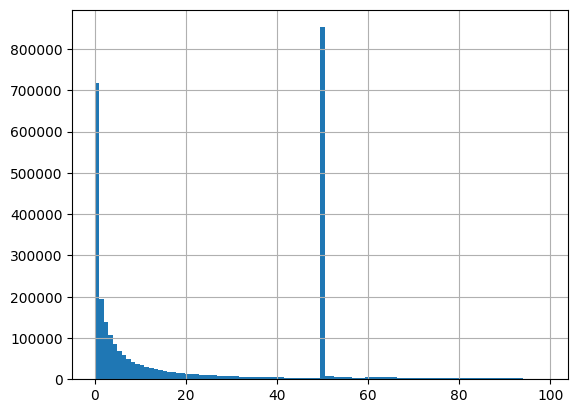

In [32]:
print('Number of papers: {}'.format(len(df)))
df['n_citation'].hist(bins=100, range=(0, 99))

We see that the most commen number of citations are 50? (weirdly enough)

In [30]:
df['n_citation'].describe()


count    3.079007e+06
mean     3.522090e+01
std      1.577007e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.100000e+01
75%      5.000000e+01
max      7.336200e+04
Name: n_citation, dtype: float64

In [31]:
print('Number of papers with 0 citations: {}'.format(len(df[df['n_citation'] == 0])))
print('Max citations: {}'.format(df['n_citation'].max()))
print('Mean citations: {}'.format(df['n_citation'].mean()))

Number of papers with 0 citations: 718250
Max citations: 73362


Now we delete all papers with 0 and 50 citations

In [34]:
df = df[(df[['n_citation']] != 0).all(axis=1)]
df = df[(df[['n_citation']] != 50).all(axis=1)]

In [36]:
print('Number of papers: {}'.format(len(df)))
print('Mean citations: {}'.format(df['n_citation'].mean()))
df['n_citation'].describe()


Number of papers: 1508073
Mean citations: 43.63927077800611


count    1.508073e+06
mean     4.363927e+01
std      2.235855e+02
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      3.300000e+01
max      7.336200e+04
Name: n_citation, dtype: float64

<Axes: >

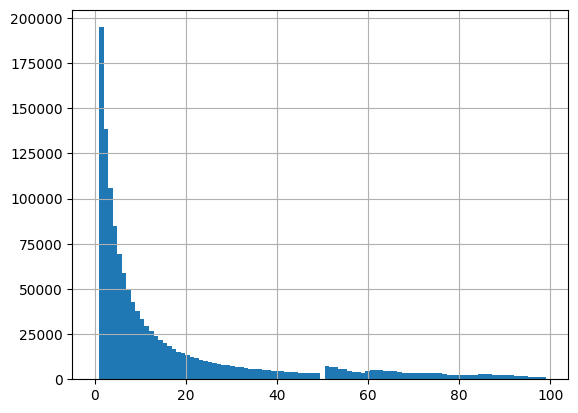

In [37]:
df['n_citation'].hist(bins=100, range=(0, 99))

The histogram looks like it could follow a power-law, eventhough we see a tendency for slightly more citations after 50 citations, which could be something related to the many 50 citation

Load graph

In [38]:
## Run this code once to create the pickle file and then comment it out

G = dataset.load_graph(df)
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
pickle.dump(G, open( "base_graph.pkl", "wb" ) )


  0%|          | 0/1508073 [00:00<?, ?it/s]

100%|██████████| 1508073/1508073 [17:08<00:00, 1466.32it/s] 


Number of nodes:  2069296
Number of edges:  14077569


In [ ]:
## Here you open the pickle file to load the graph
with open("base_graph.pkl", 'rb') as f:
    G = pickle.load(f)